<a href="https://colab.research.google.com/github/Dhairyajeet-singh/Image-classification-Dog-vs-Cat/blob/main/deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:38<00:00, 28.6MB/s]
100% 1.06G/1.06G [00:38<00:00, 30.0MB/s]


In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import zipfile
zip_data = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_data.extractall('/content/')
zip_data.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import cv2
from keras.layers import BatchNormalization, Dropout

In [ ]:
img = cv2.imread('/content/test/dogs/dog.10032.jpg')
img

array([[[ 39, 181, 146],
        [ 21, 165, 130],
        [  9, 158, 124],
        ...,
        [ 28, 159, 132],
        [ 37, 168, 141],
        [ 47, 178, 151]],

       [[ 40, 182, 147],
        [ 38, 182, 147],
        [ 16, 165, 131],
        ...,
        [ 38, 171, 144],
        [ 50, 183, 156],
        [ 68, 201, 174]],

       [[ 37, 179, 144],
        [ 52, 196, 161],
        [ 21, 170, 136],
        ...,
        [ 47, 183, 155],
        [ 53, 189, 161],
        [ 67, 203, 175]],

       ...,

       [[ 33, 141, 123],
        [ 39, 147, 129],
        [  9, 116,  97],
        ...,
        [ 78, 190, 166],
        [ 51, 161, 137],
        [ 67, 177, 153]],

       [[ 49, 153, 136],
        [ 58, 162, 145],
        [ 30, 135, 116],
        ...,
        [ 52, 162, 136],
        [ 23, 132, 106],
        [ 35, 144, 118]],

       [[ 65, 167, 150],
        [ 70, 172, 155],
        [ 52, 154, 136],
        ...,
        [ 62, 173, 145],
        [ 31, 138, 111],
        [ 41, 148, 121]]

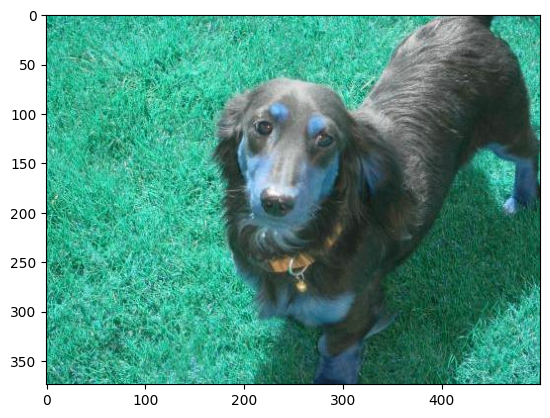

In [ ]:
plt.imshow(img)

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode='int',
    batch_size = 32,
    image_size = (256,256),
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode='int',
    batch_size = 32,
    image_size = (256,256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
print('Number of Batches:{20000//32}')

Number of Batches:{20000//32}


In [ ]:
#Normalization
def scale_down_px(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

In [ ]:
train_ds = train_ds.map(scale_down_px)
test_ds = test_ds.map(scale_down_px)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3) ,strides=1, padding='valid' , activation='relu' , input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3) ,strides=1, padding='valid' , activation='relu' , input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3) ,strides=1, padding='valid' , activation='relu' , input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics='accuracy')



In [ ]:
history = model.fit(train_ds, validation_data = test_ds, epochs=10)


Epoch 1/10
625/625 [==============================] - 82s 108ms/step - loss: 1.3292 - accuracy: 0.5785 - val_loss: 0.6405 - val_accuracy: 0.6530
Epoch 2/10
625/625 [==============================] - 72s 114ms/step - loss: 0.6135 - accuracy: 0.6689 - val_loss: 0.5802 - val_accuracy: 0.7044
Epoch 3/10
625/625 [==============================] - 71s 113ms/step - loss: 0.5233 - accuracy: 0.7444 - val_loss: 0.5965 - val_accuracy: 0.7500
Epoch 4/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4801 - accuracy: 0.7774 - val_loss: 0.5275 - val_accuracy: 0.7552
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4275 - accuracy: 0.8093 - val_loss: 0.5319 - val_accuracy: 0.7464
Epoch 6/10
625/625 [==============================] - 79s 127ms/step - loss: 0.3750 - accuracy: 0.8342 - val_loss: 0.4372 - val_accuracy: 0.7906
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3029 - accuracy: 0.8658 - val_loss: 0.4156 - val_ac

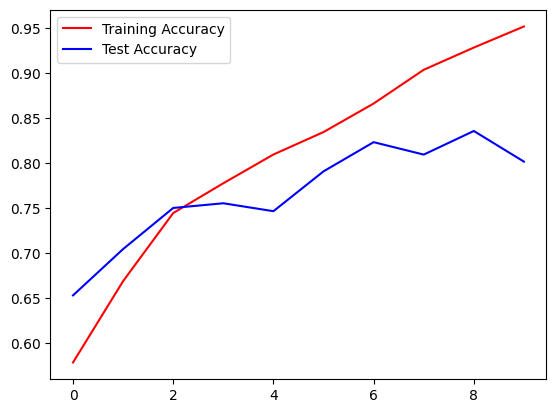

In [ ]:
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Test Accuracy')
plt.legend()
plt.show()

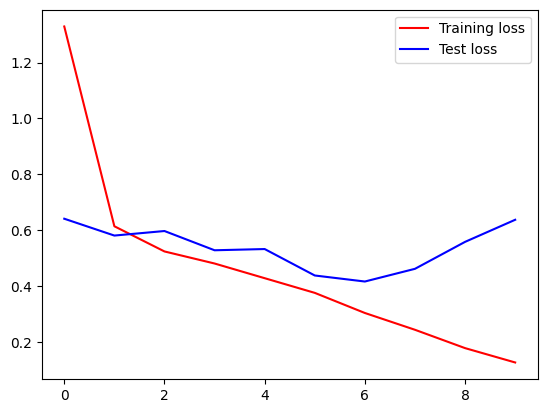

In [ ]:
plt.plot(history.history['loss'], color='red', label='Training loss')
plt.plot(history.history['val_loss'], color='blue', label='Test loss')
plt.legend()
plt.show()

In [ ]:
test_img = cv2.imread('/content/dog.jpg')


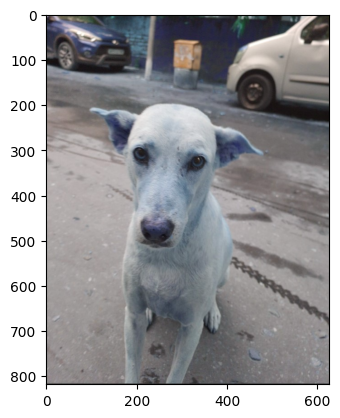

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(818, 627, 3)

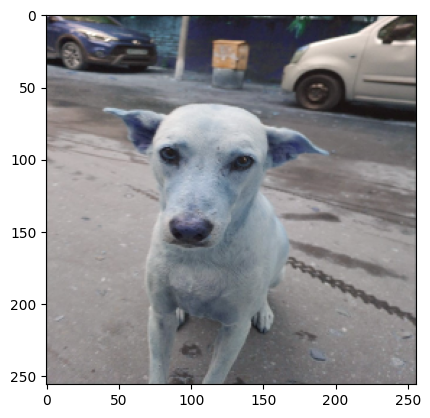

In [ ]:
test_img = cv2.resize(test_img, (256,256))
plt.imshow(test_img)

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
test_input = test_img.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)[0][0]

1/1 [==============================] - 0s 37ms/step


1.0

In [ ]:
output = model.predict(test_input)[0][0]
print('Output is: {output} \n')

if output < 0.5:
  print('This is a Cat')
else:
  print('This is a Dog')

1/1 [==============================] - 0s 17ms/step
Output is: {output} 

This is a Dog
